**Features**

COLUMN Description

EDUC	-Years of Education

SES	-Socioeconomic Status

MMSE	-Mini Mental State Examination

CDR	-Clinical Dementia Rating

eTIV	-Estimated Total Intracranial Volume

nWBV	-Normalize Whole Brain Volume

ASF	-Atlas Scaling Factor

# Working on the whole dataset




In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('oasis.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [ ]:
df.drop(['Subject ID','MRI ID'],axis=1,inplace=True)

# Exploratory Data Analysis

In [ ]:
print("Total Rows and Columns (Rows,Columns) : ",df.shape)

Total Rows and Columns (Rows,Columns) :  (373, 13)


In [ ]:
# gives the top 5 rows of the dataset
df.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [ ]:
df.nunique()

Group         3
Visit         5
MR Delay    201
M/F           2
Hand          1
Age          39
EDUC         12
SES           5
MMSE         18
CDR           4
eTIV        371
nWBV        373
ASF         371
dtype: int64

In [ ]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.121584,0.729556,1.195460
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.135956,0.037141,0.138105
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1105.652499,0.644399,0.875539
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.330000,0.700191,1.098979
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.041312,0.728789,1.193844
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1596.936793,0.755669,1.292980
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.479526,0.836842,1.587298


In [ ]:
df.drop(['Hand','Visit','MR Delay'],axis=1,inplace=True)

In [ ]:
#print a short summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    object 
 1   Visit     373 non-null    int64  
 2   MR Delay  373 non-null    int64  
 3   M/F       373 non-null    object 
 4   Age       373 non-null    int64  
 5   EDUC      373 non-null    int64  
 6   SES       354 non-null    float64
 7   MMSE      371 non-null    float64
 8   CDR       373 non-null    float64
 9   eTIV      373 non-null    float64
 10  nWBV      373 non-null    float64
 11  ASF       373 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 35.1+ KB


In [ ]:
group_type=df['Group'].unique()
group_type

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [ ]:
# changing converted value into demented
# we can use replace method to replace specific values or replace based on conditions or replace
# with a dictionary mapping

df['Group'].replace(['Converted'], ['Demented'],inplace=True)

In [ ]:
df['Group'].replace(['Demented','Nondemented'], [1,0],inplace=True)
df['M/F'].replace(['M','F'], [1,0],inplace=True)

In [ ]:
df['Group'].value_counts()

0    190
1    183
Name: Group, dtype: int64

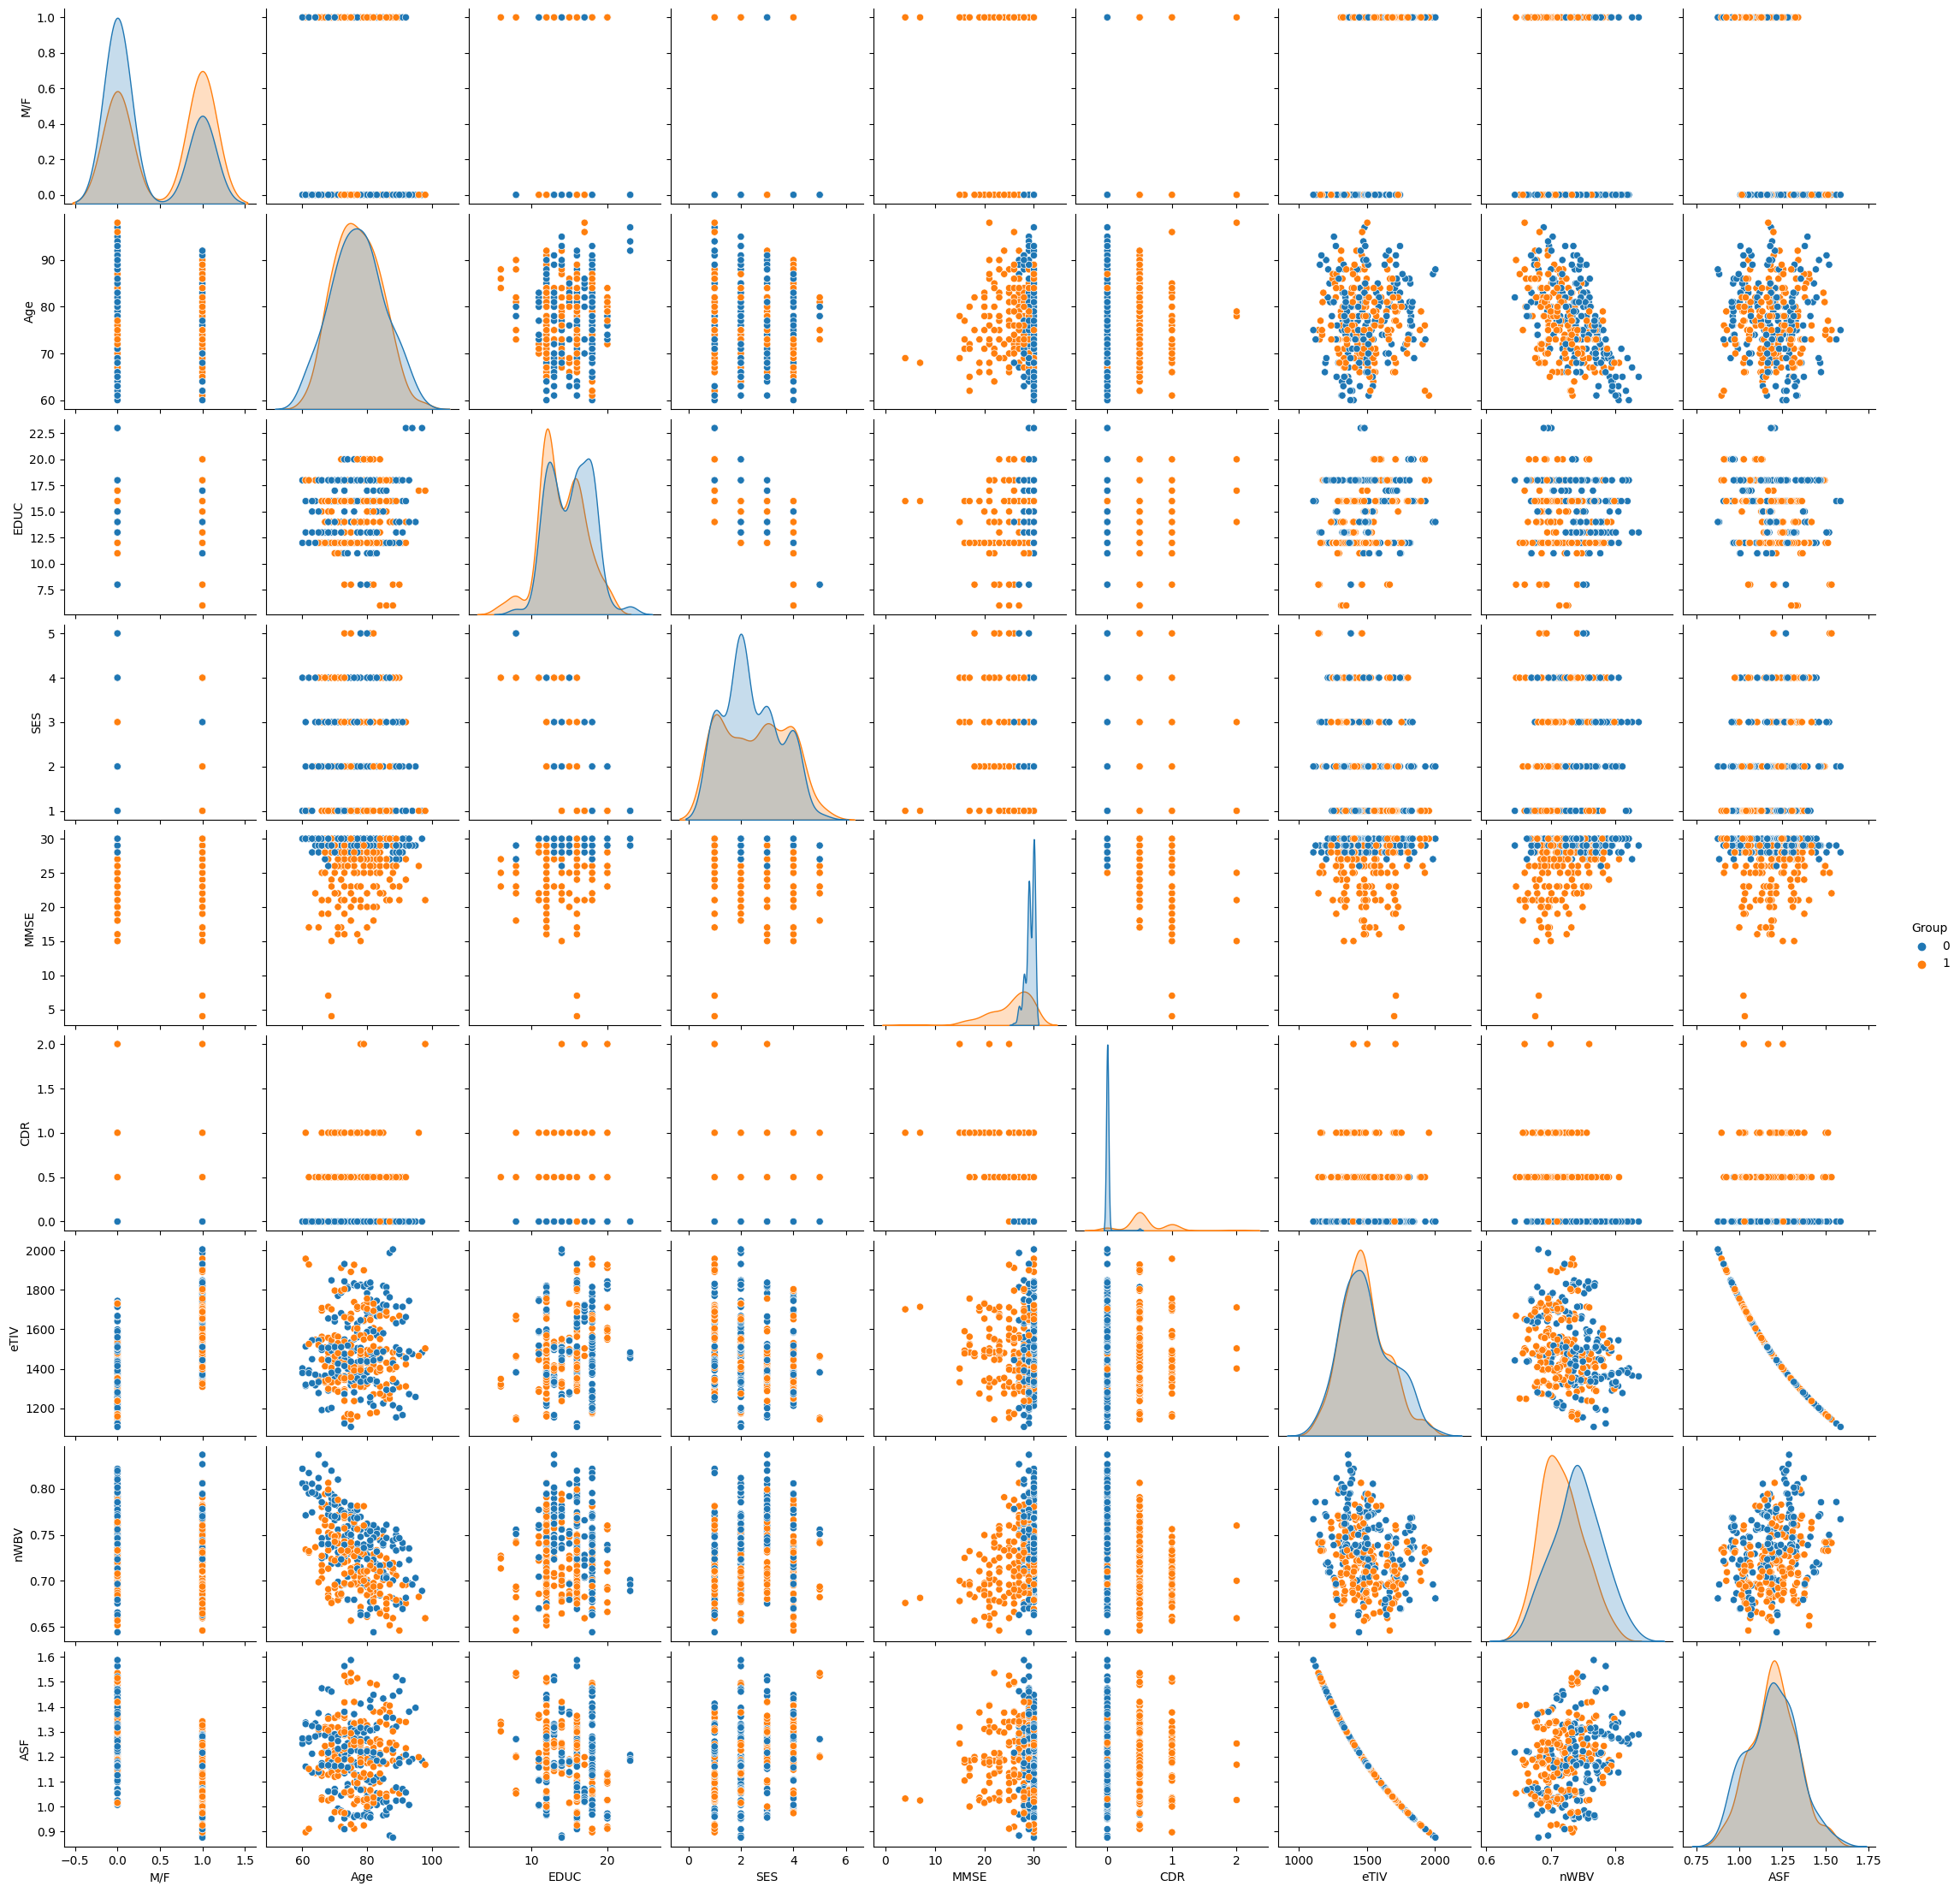

In [ ]:
# using pairplot to visualise each feature against every other feature
# kde -> Kernel Density Estimation.  smoothed representations of the distribution of each variable.
# scatter -> displays individual data points as dots on a two-dimensional plane.
sns.pairplot(df, hue ='Group', diag_kind ='kde', kind = 'scatter')

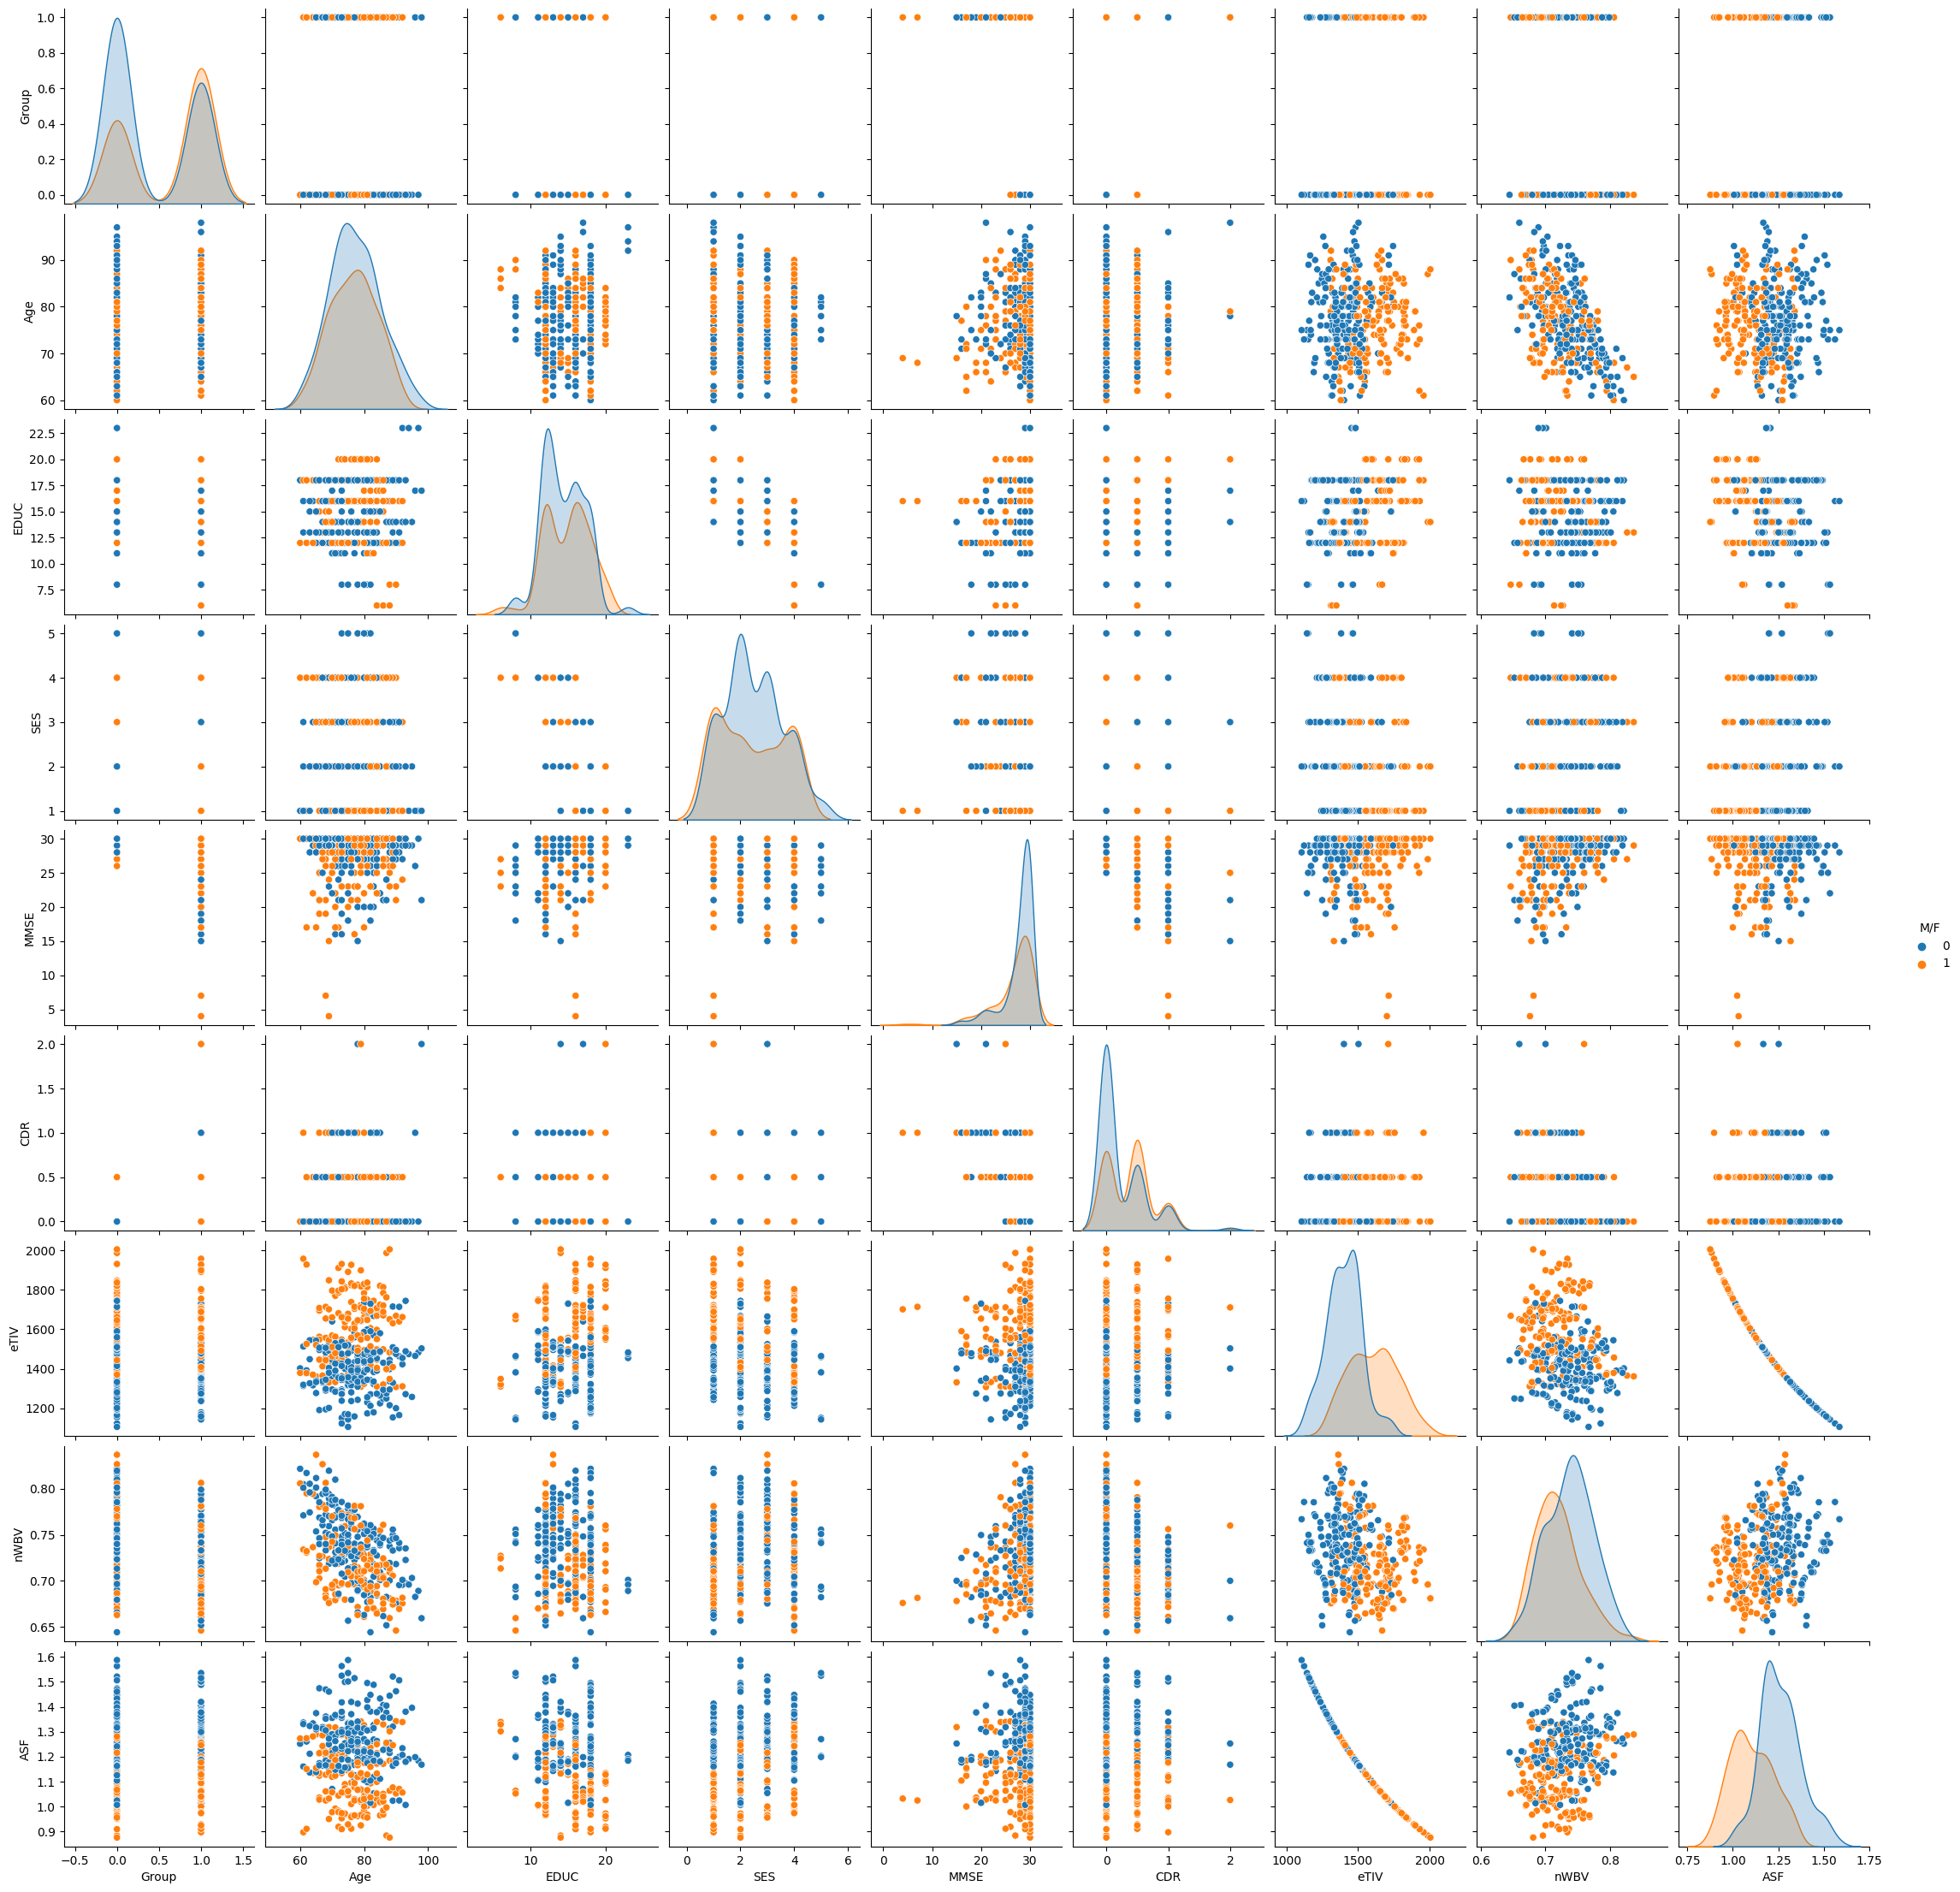

In [ ]:
sns.pairplot(df, hue ='M/F', diag_kind ='kde', kind = 'scatter')

In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap='PuRd')

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,0.222146,-0.005941,-0.193060,0.062463,-0.524775,0.778049,-0.042579,-0.310893,0.032463
M/F,0.222146,1.000000,-0.037726,0.089279,-0.045776,-0.166860,0.202140,0.572589,-0.249316,-0.561648
Age,-0.005941,-0.037726,1.000000,-0.027886,-0.046857,0.055612,-0.026257,0.042401,-0.518546,-0.034845
EDUC,-0.193060,0.089279,-0.027886,1.000000,-0.722647,0.194884,-0.153121,0.257042,-0.012300,-0.241696
SES,0.062463,-0.045776,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261582,0.089956,0.255448
MMSE,-0.524775,-0.166860,0.055612,0.194884,-0.149219,1.000000,-0.686519,-0.032088,0.341912,0.040145
CDR,0.778049,0.202140,-0.026257,-0.153121,0.076160,-0.686519,1.000000,0.022863,-0.344873,-0.029426
eTIV,-0.042579,0.572589,0.042401,0.257042,-0.261582,-0.032088,0.022863,1.000000,-0.209875,-0.988868
nWBV,-0.310893,-0.249316,-0.518546,-0.012300,0.089956,0.341912,-0.344873,-0.209875,1.000000,0.213073
ASF,0.032463,-0.561648,-0.034845,-0.241696,0.255448,0.040145,-0.029426,-0.988868,0.213073,1.000000


In [ ]:
df.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [ ]:
X=df.iloc[:,1:].values
y=df.iloc[:,:1].values

In [ ]:
# social status somewhat follows gaussian distribution so its more sensible to impute with mean than median.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
X[:,3:4]=imputer.fit_transform(X[:,3:4])
# MMSE score is replaced by the most frequent observations
imputer2=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X[:,4:5]=imputer.fit_transform(X[:,4:5])

# Training the Models


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#  CLASSIFICATION REPORT
#  Macro avg provides a class-agnostic and balanced view of the model's performance,
#  while Weighted avg gives more weight to the performance of the classes with larger support,
#  reflecting their importance in the dataset.

In [ ]:
def plot_confusion_matrix(y_test, model_test):
    cm = confusion_matrix(y_test, model_test.predict(X_test))
    class_names = ['Demented', 'Nondemented']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, predictions_test)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


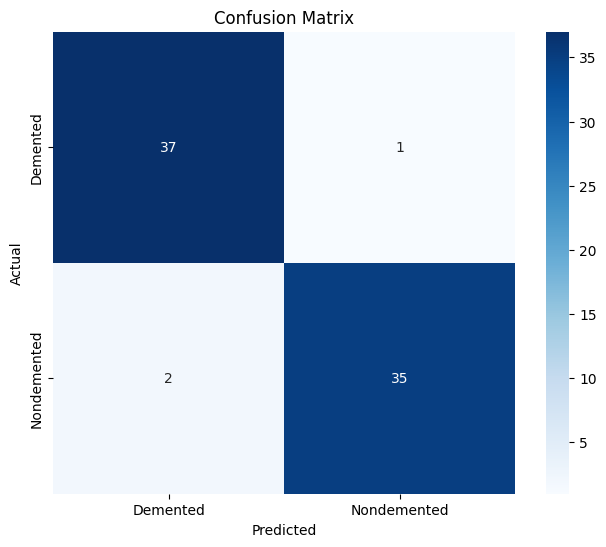

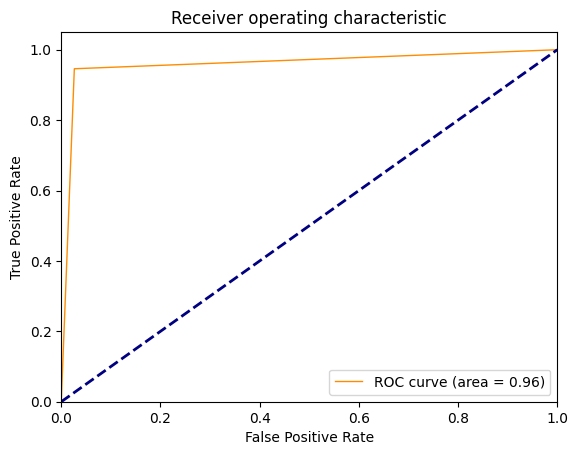

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.97      0.95      0.96        37

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75


Accuracy Of the Model:  0.96 




In [ ]:
svc=SVC(kernel='linear',random_state=0)
svc.fit(X_train,y_train)
plot_confusion_matrix(y_test,svc)
roc_curves(svc)
print(classification_report(y_test,svc.predict(X_test)))
print("\nAccuracy Of the Model: ",accuracy_score(y_test,svc.predict(X_test)),"\n\n")

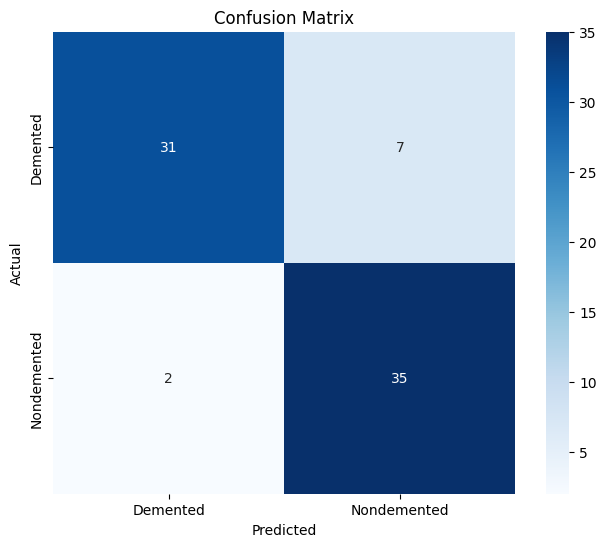

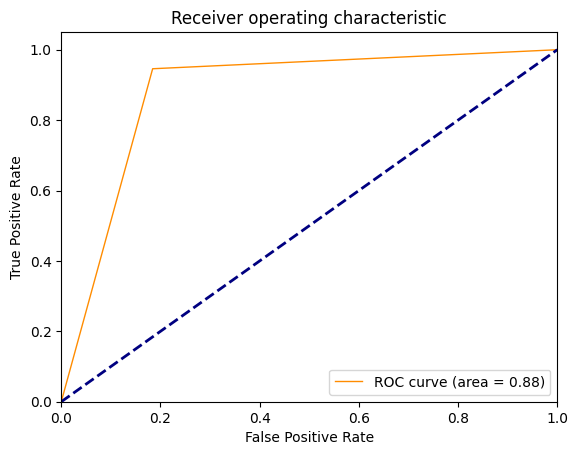

              precision    recall  f1-score   support

           0       0.94      0.82      0.87        38
           1       0.83      0.95      0.89        37

    accuracy                           0.88        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.89      0.88      0.88        75


Accuracy Of the Model:  0.88 




In [ ]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
plot_confusion_matrix(y_test,dt)
roc_curves(dt)
print(classification_report(y_test,dt.predict(X_test)))
print("\nAccuracy Of the Model: ",accuracy_score(y_test,dt.predict(X_test)),"\n\n")

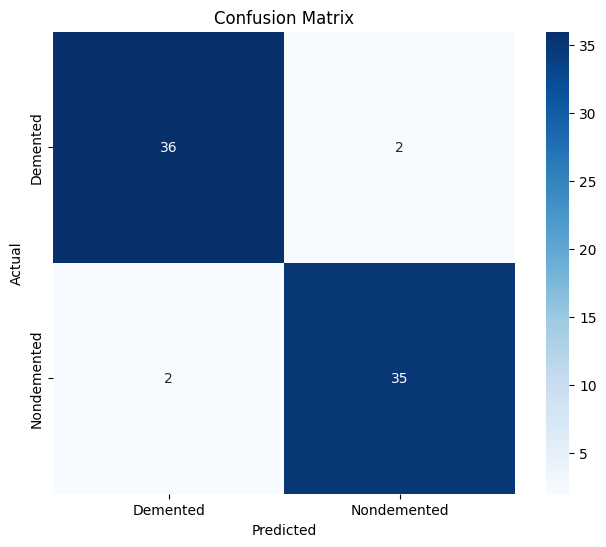

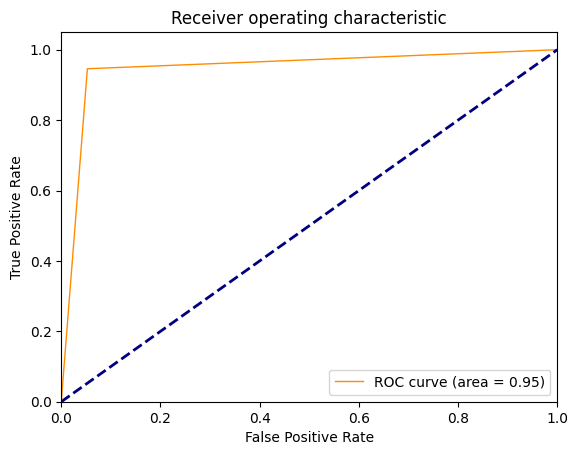

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.95      0.95      0.95        37

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75


Accuracy Of the Model:  0.9466666666666667 




In [ ]:
rf=RandomForestClassifier(n_estimators=50,random_state=0)
# .ravel() is used to flatten a multi dimensional array
rf.fit(X_train,y_train.ravel())
plot_confusion_matrix(y_test,rf)
roc_curves(rf)
print(classification_report(y_test,rf.predict(X_test)))
print("\nAccuracy Of the Model: ",accuracy_score(y_test,rf.predict(X_test)),"\n\n")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


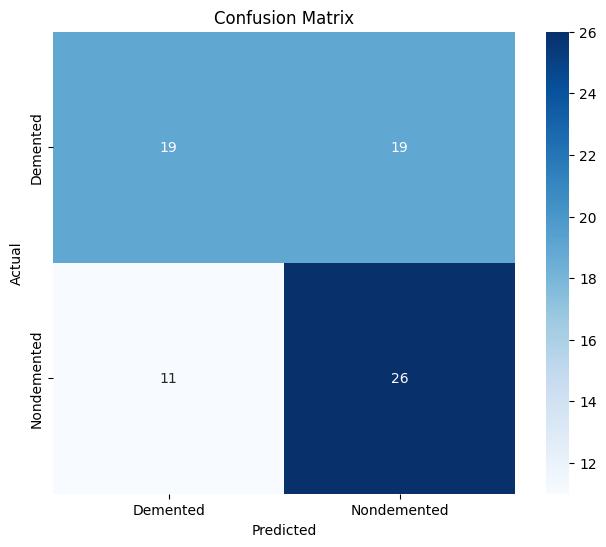

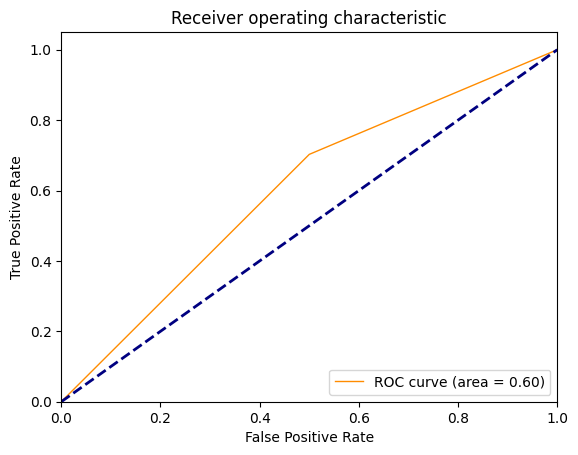

              precision    recall  f1-score   support

           0       0.63      0.50      0.56        38
           1       0.58      0.70      0.63        37

    accuracy                           0.60        75
   macro avg       0.61      0.60      0.60        75
weighted avg       0.61      0.60      0.60        75


Accuracy Of the Model:  0.6 




In [ ]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2,weights='uniform')
knn.fit(X_train,y_train)
plot_confusion_matrix(y_test,knn)
roc_curves(knn)
print(classification_report(y_test,knn.predict(X_test)))
print("\nAccuracy Of the Model: ",accuracy_score(y_test,knn.predict(X_test)),"\n\n")